# Hosting a static website via AWS EC2 and Lambda

Credit: Educative.io

### Via EC2

Before we create EC2 instance we need to create Security group and IAM:
- Security groups are rules that manage the inbound and outbound traffic for the instance. In simple terms, they can be considered a firewall for the instance.
- AWS Identity Access and Management (IAM) roles are AWS identities with an identity-based policy specifying their access. So far, this is similar to IAM users. **However, what makes roles unique is that instead of being directly associated with someone, anyone can assume a role, including IAM users and AWS services**. This gives them temporary credentials to access resources and services based on the policy. We can allow our EC2 instances to access other services using IAM roles.


Let's create an EC2 instance and host a simple website described by this html:

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Sample webpage</title>
    <style>
        .container {
            display: flex;
            align-items: center;
        }
        .image {
            max-width: 20%;
        }
        .text {
            max-width: 80%;
            padding: 20px;
        }
    </style>
</head>
<body>
    <div class="container">
        <img class="image" src="<IMAGE URL>" alt="Sample Image">
        <div class="text">
            <h1>Sample Text</h1>
            <p>This is some sample text that is arranged side by side with an image.</p>
        </div>
    </div>
</body>
</html>
```


Next we install and start `nginx` that will host our page:

```bash
#!/bin/bash
sudo apt update
sudo apt -y install awscli
sudo apt -y install nginx
sudo systemctl start nginx.service
sudo systemctl status nginx.service
```

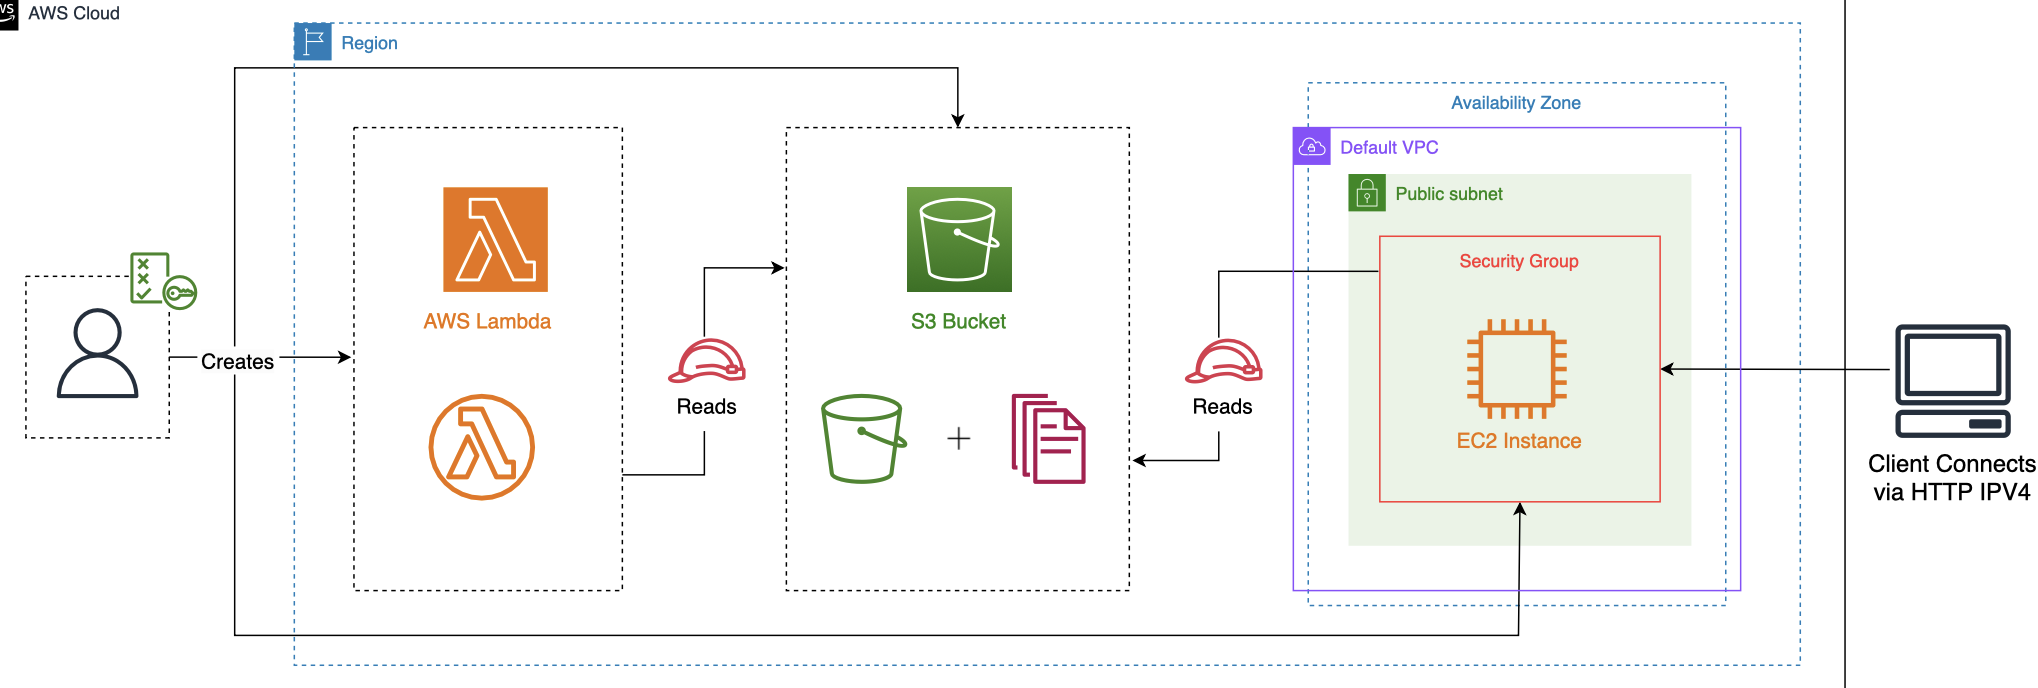

### Via AWS Lambda 

We don't need to use EC2 instance if the page is static, and instead use serverless AWS Lambda function, running following python code as event handler:

```python
import boto3

s3 = boto3.client('s3')
def lambda_handler(event, context):
    bucket_name = '<BUCKET-NAME>'
    index_file = 'index.html'
    
    try:
        response = s3.get_object(Bucket=bucket_name, Key=index_file)
        content = response['Body'].read().decode('utf-8')
        
        return {
            'statusCode': 200,
            'headers': {
                'Content-Type': 'text/html',
            },
            'body': content
        }
    except Exception as e:
        return {
            'statusCode': 500,
            'body': str(e)
        }
```